In [2]:
import numpy as np
import librosa
from matplotlib import pyplot as plt
import scipy.ndimage
import IPython.display as display

In [104]:
audio, rate = librosa.load('sample.wav')
stft = librosa.core.stft(audio)
spectrogram = np.abs(stft)
phase = np.angle(stft)

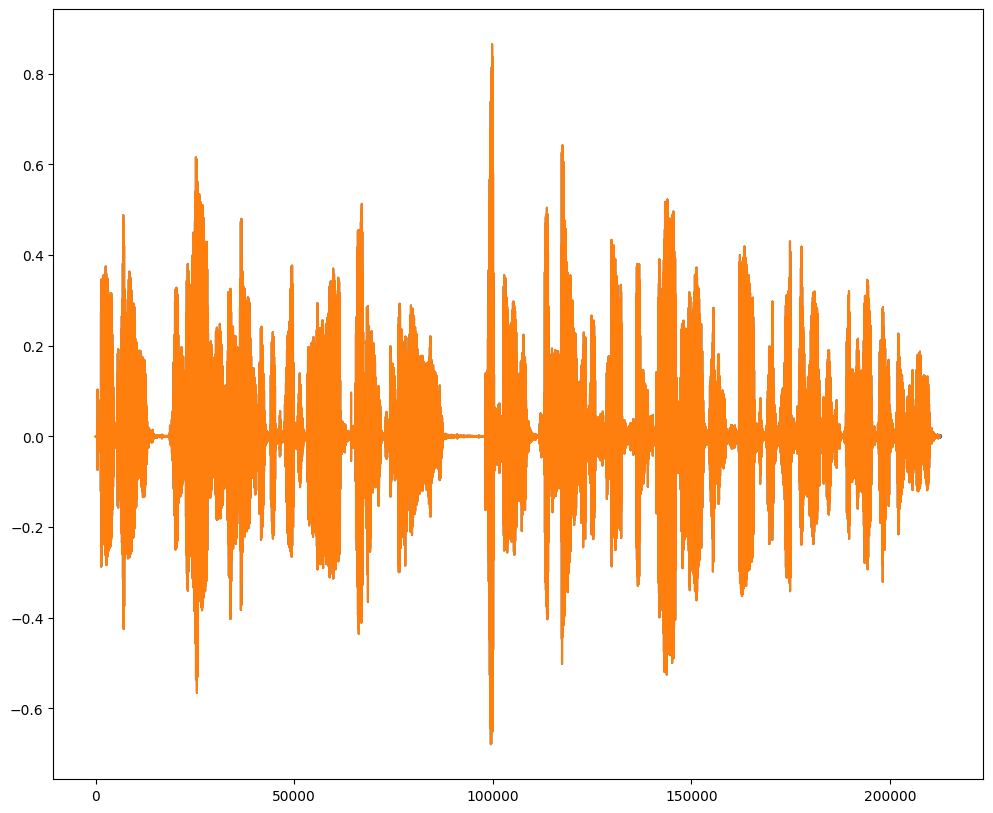

In [151]:
restored_audio = librosa.core.istft(spectrogram * np.exp(1j * phase))

plt.figure(figsize=(12,10))
plt.plot(audio)
plt.plot(restored_audio)

Алгоритм Гриффина-Лима (Griffin-Lim)

In [105]:
import copy
from tqdm import tqdm

def griffin_lim(spectrogram, iterations=10, eps=1e-5):
    curr_spec = copy.deepcopy(spectrogram)
    for i in tqdm(range(iterations)):
        next_spec = librosa.stft(librosa.istft(curr_spec)) # get next step approximation X_t+1 = F(F^-1(X_t))
        curr_spec = spectrogram * (next_spec / np.maximum(eps, np.abs(next_spec))) # save original magnitude, update only imaginary part
    result = np.real(librosa.istft(curr_spec))
    return result
    

In [106]:
audio_iter1 = griffin_lim(spectrogram, iterations=1)
display.Audio(audio_iter1, rate=rate)

100%|██████████| 1/1 [00:00<00:00, 68.01it/s]


In [107]:
audio_iter10 = griffin_lim(spectrogram, iterations=10)
display.Audio(audio_iter10, rate=rate)

100%|██████████| 10/10 [00:00<00:00, 76.00it/s]


In [108]:
audio_iter1000 = griffin_lim(spectrogram, iterations=1000)
display.Audio(audio_iter1000, rate=rate)

100%|██████████| 1000/1000 [00:12<00:00, 77.21it/s]


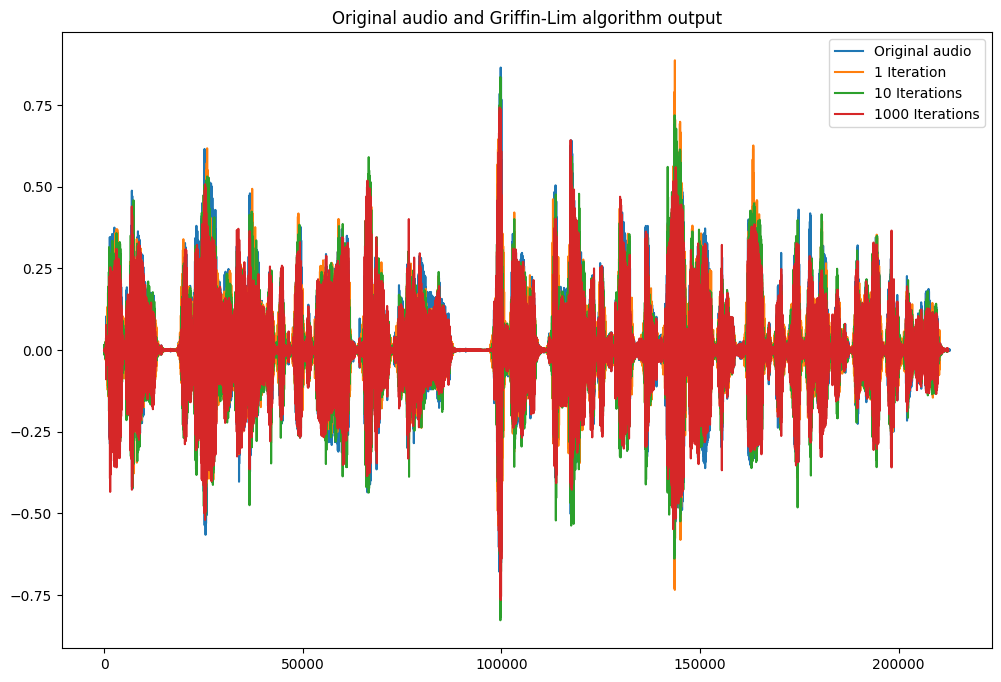

In [140]:
plt.figure(figsize=(12, 8))
plt.plot(audio, label='Original audio')
plt.plot(audio_iter1, label='1 Iteration')
plt.plot(audio_iter10, label='10 Iterations')
plt.plot(audio_iter1000, label='1000 Iterations')
plt.legend()
plt.title('Original audio and Griffin-Lim algorithm output')
plt.show()

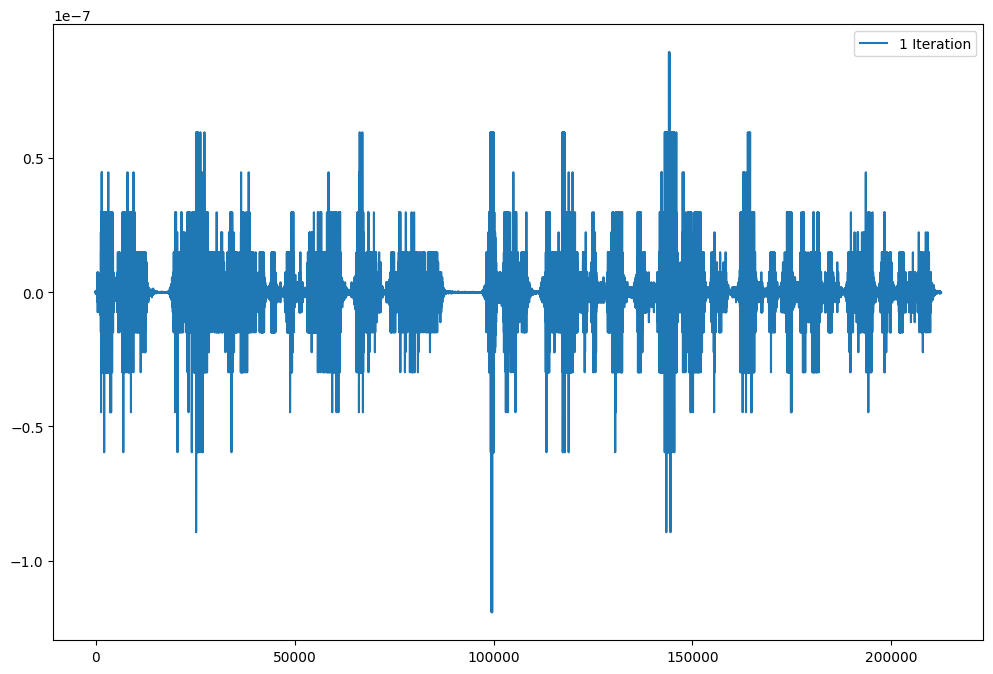

In [161]:
plt.figure(figsize=(12, 8))
plt.plot(audio[0:len(restored_audio)] - restored_audio, label='1 Iteration')
plt.legend()

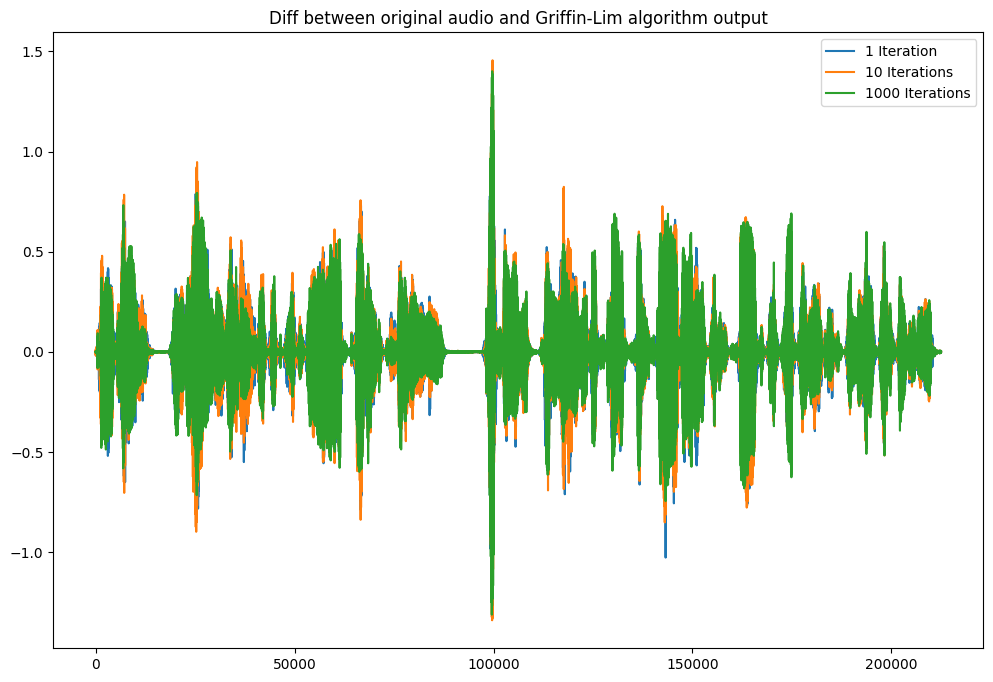

In [162]:
plt.figure(figsize=(12, 8))
plt.plot(audio[0:len(audio_iter1)] - audio_iter1, label='1 Iteration')
plt.plot(audio[0:len(audio_iter1)] - audio_iter10, label='10 Iterations')
plt.plot(audio[0:len(audio_iter1)] - audio_iter1000, label='1000 Iterations')
plt.legend()
plt.title('Diff between original audio and Griffin-Lim algorithm output')
plt.show()

Пробуем озвучить мел-спектрограмму

/var/folders/0s/2bdb95h55f56fyk_zxckmnw40000gn/T/ipykernel_7347/2719310256.py:1: FutureWarning: Pass y=[-7.3242188e-04 -7.6293945e-04 -6.4086914e-04 ...  7.3242188e-04
  2.1362305e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(audio)


(1025, 416)


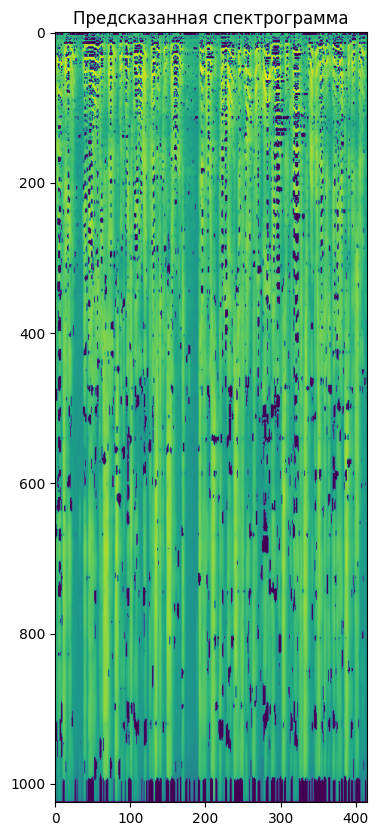

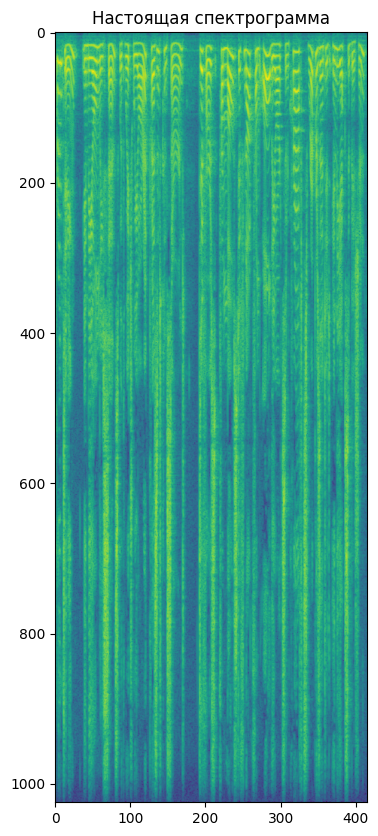

In [31]:
mel_spectrogram = librosa.feature.melspectrogram(audio)

restored_spectrogram = librosa.feature.inverse.mel_to_stft(mel_spectrogram)
print(restored_spectrogram.shape)

plt.figure(figsize=(12, 10))
plt.title('Предсказанная спектрограмма')
plt.imshow(np.log(1.e-8 + restored_spectrogram))
plt.figure(figsize=(12, 10))
plt.title('Настоящая спектрограмма')
plt.imshow(np.log(1.e-8 + spectrogram))



In [32]:
restored_audio = griffin_lim(restored_spectrogram, iterations=100)
display.Audio(restored_audio, rate=rate)